# Uge 5: Taylor-approksimationer
Demo af Christian Mikkelstrup, Hans Henrik Hermansen, Jakob Lemvig, Karl Johan Måstrup Kristensen og Magnus Troen

In [1]:
from sympy import *
from sympy.abc import x,y,z,u,v,w,t
from dtumathtools import *
init_printing()

## Taylor-polynomier for funktioner af en variable

Vi vil gerne prøve at approksimere hhv. $\ln(x)$ og $\sin(x)$ via Taylor-polynomier og undersøge hvordan graden af polynomierne påvirker approksimeringen af den originale funktion.

Kommandoen for Taylor-udvikling i SymPy er `series` og har følgende format:

$\verb|series(funktion, variabel, x0, K+1)|$

**OBS!!**: Det er vigtigt at huske at antallet af led $K$ i SymPy's funktionskald skal være én større end det $K$ som beskrives i lærebogen. Så ønskes fx et approksimerende polynomium af 6. grad med udviklingspunktet $x_0 = 0$, dvs $P_6(x)$, af funktionen $\cos(x)$ skrives i SymPy:

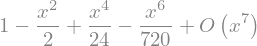

In [2]:
series(cos(x), x, 0, 7)

Derudover kan man se at SymPy tilføjer leddet $O(x^{K+1})$. Denne notation kaldes "Big O" og betyder løst sagt at fejlen går hurtigere mod nul end $x^{K+1}$. Det er altså en beskrivelse af restleddet $R_K(x)$ som i **Taylors formel 4.3.2** i lærebogen. Den kan dog **ikke** bruges til at finde et udtryk for restfunktionen. Der skal man selv lave undersøgelser for funktionen i det gældende interval.

Hvis vi kun ønsker Taylor-polynomiet (og ikke information om fejlens størrelse), fjerner vi $O(x^{K+1})$-leddet med $\verb|.removeO()|$:

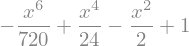

In [3]:
series(cos(x), x, 0, 7).removeO()

Dette er nu et polynomium vi kan evaluere. Så med den information kan vi nu undersøge funktioner og deres approksimationer. Betragt for eksempel funktionen $f:=\ln(x)$:

Her oprettes der først et plot med $\verb|show = False|$, for at vi med $\verb|.extend()|$ kan tilføje de andre plots til samme plot.
Ud fra vores plot er det tydeligt at se, at når vi øger $K$, så bliver vores approksimation også bedre. Vi tjekker kort det samme for $\sin(x)$, denne gang med $x_0 = 0$

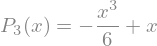

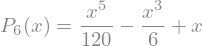

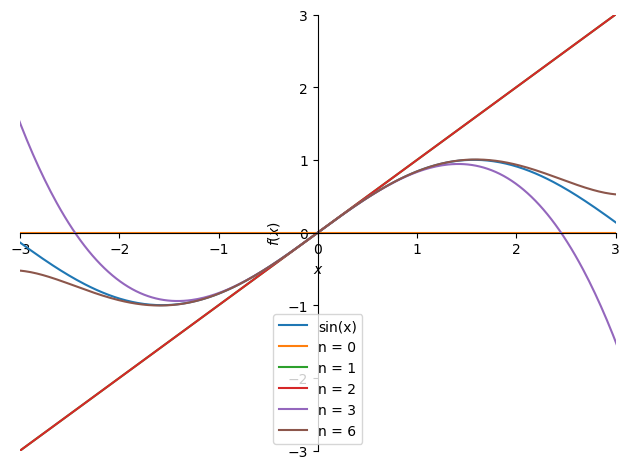

In [ ]:
pl = plot(sin(x),xlim = (-3,3), ylim = (-3,3), show=False, legend = True)
for K in [0,1,2,3,6]:
    newseries = series(sin(x),x,0,K+1).removeO()
    display(Eq(Function(f'P_{K}')(x), newseries))
    newplot = plot(newseries,label = f"n = {K}", show=False)
    pl.extend(newplot)
pl.show()

Her kan vi se, at kun fire forskellige linjer er tydeligt synlige. Hvis man kigger over plottet kan man også se hvorfor. Per definition er 

\begin{align*}
P_0(x) &= f(x_0) = \sin(0) = 0 \\
P_1(x) &= f(x_0)  + f'(x_0)(x-x_0)\\ 
       &= \sin(0) + \cos(0) x \\
       &= x \\
P_2(x) &= f(x_0)  + f'(x_0)(x-x_0) + \frac{1}{2} f''(x_0)(x-x_0)^2 \\ 
       &= \sin(0) + \cos(0) x - \sin(0) x^2 \\
       &= x
\end{align*}

for $x\in\mathbb{R}$.

## Vurdering af restfunktionen vha. Taylor's formel

Vi vil gerne forsøge at finde en tilnærmet værdi af $\ln\left(\frac{5}{4}\right)$ vha. af det approksimerende polynomium $P_3(x)$ udviklet i punket $x_0=1$.

Vi skal først bestemme $P_3(x)$

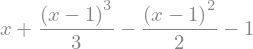

In [5]:
x = symbols("x")
P3 = series(ln(x),x,1,4).removeO()
P3

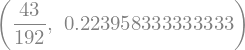

In [6]:
val = P3.subs(x,Rational(5/4))
val, val.evalf()

Vi ved udfra **Taylors formel 4.3.1** at der findes et $\xi \in ]1;\frac{5}{4}[$ sådan at fejlen $R_3(\frac{5}{4})$ kan skrives som:

\begin{equation*}
    R_3\left(\frac{5}{4}\right) = \frac{f^{(4)}(\xi)}{4!}\cdot\left(\frac{5}{4} - 1\right)^4
\end{equation*}

Her skal vi først finde ud af hvilket tal i intervallet for $\xi$ fører til den største fejl. Hvis vi approksimerer vores fejl med dette, kan vi være sikre på, at den **_egentlige_** fejl er mindre. $f^{(4)}(\xi)$ er det eneste led, der er afhængigt af $\xi$ og bestemmes til

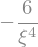

In [7]:
xi = symbols("xi")
diff(ln(x),x,4).subs(x,xi)

Her får vi resultatet $-\frac{6}{\xi^4}$. Nu skal vi blot analysere udtrykket for at finde ud af, hvilket $\xi$ gør udtrykket størst. Vi kan i dette tilfælde se, at $\xi$ står i nævneren, og derfor bliver udtrykket større, hvis $\xi$ er mindre. I dette tilfælde betyder det, at vi bare skal vælge den mindste værdi muligt for $\xi$, hvilket i dette tilfælde er 1. Nu kan foretage vores approksimation af fejlen.

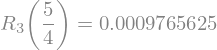

The correct value of ln(5/4) is in the interval:


In [8]:
R3 = abs(diff(ln(x),x,4).subs(x,1) * (5/4 - 1) ** 4 /(factorial(4)))
display(Eq(Function('R_3')(S('5/4')), R3))
print('The correct value of ln(5/4) is in the interval:')
Interval(val - R3, val + R3)

Vi har nu bestemt fejlen, og vi kan nu garantere, at den rigtige værdi af $\ln(\frac{5}{4})$ ligger i intervallet $]0.2229;0.2250[$, (åbent pga. afrunding).
Lad os sammenligne det med python's værdi (Der i sig selv er en approksimation),

In [9]:
ln(5/4), Interval(val - R3, val + R3).contains(ln(5/4))

## Grænseværdier vha. Taylor's grænseformel

Vi vil nu benytte Taylor's grænseformel til at bestemme grænseværdien af forskellige udtryk. Dette ses oftest med brøker, hvor tælleren, nævneren eller begge indeholder udtryk, der ikke er nemme at arbejde med. Måden vi får adgang til Taylor's grænseformel i SymPy er ved hjælp af funktionen `series`, hvor vi undlader at bruge `.removeO()` efter. I lærebogen bruges epsilon-funktioner, men SymPy bruger $O$-symbolet. De to koncepter er ikke helt sammenlignelige men hvis SymPy skriver $O(x^{K+1})$, kan vi i stedet skrive $\varepsilon(x) \, x^{K}$ hvor $\varepsilon(x) \to 0$ for $x \to 0$.

### Eksempel 1

Vi vil først undersøge udtrykket $\frac{\sin(x)}{x}$ når $x\rightarrow 0$,

In [10]:
series(sin(x),x,0,n=3)

Dette giver os
\begin{gather*}
    \frac{\sin(x)}{x} = \frac{x + \epsilon (x) \cdot x^2}{x} = 1 + \epsilon (x)x \rightarrow 1, \text{ når } x \rightarrow 0
\end{gather*}

### Eksempel 2

Det kan nogle gange være noget gætværk at finde ud af, hvor mange led, man er nødt til at tage med, når man skal finde en grænseværdi med Taylor's grænseformel. Lad os f.eks. prøve 

\begin{equation*}
\frac{e^x - e^{-x} - 2x}{x-\sin(x)},
\end{equation*}


hvor $x \rightarrow 0$. Lad os evaluere tælleren og nævneren hver for sig, og se hvad der sker, når vi inkluderer flere og flere led.

In [11]:
T = E ** x - E ** (-x) - 2*x
N = x - sin(x)
series(T,x,0,2), series(N,x,0,2)

For upræcist, da vi kun får restledet med

In [12]:
series(T,x,0,3), series(N,x,0,3)

Stadig for upræcist

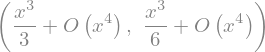

In [13]:
series(T,x,0,4), series(N,x,0,4)

Her er noget, hvor begge led har noget brugbart. Her får vi:

\begin{gather*}
    \frac{\frac{x^3}{3}+\epsilon(x)x^3}{\frac{x^3}{6}+\epsilon(x)x^3} = \\
    \frac{\frac{1}{3} + \epsilon(x)}{\frac{1}{6}+\epsilon(x)} \rightarrow \frac{\frac{1}{3}}{\frac{1}{6}} = 2, \text{ når } x \rightarrow 0
\end{gather*}

Som kontrol kan vi bruge `limit()` funktionen

In [14]:
limit(T/N,x,0)

## Taylor-polynomier for funktioner af to variable

Vi betragter følgende funktion af to variabler

$$
f:\mathbb{R}^2 \to \mathbb{R},\quad f(x,y) = \sin(x^2 + y^2)
$$

Den er plottet herunder

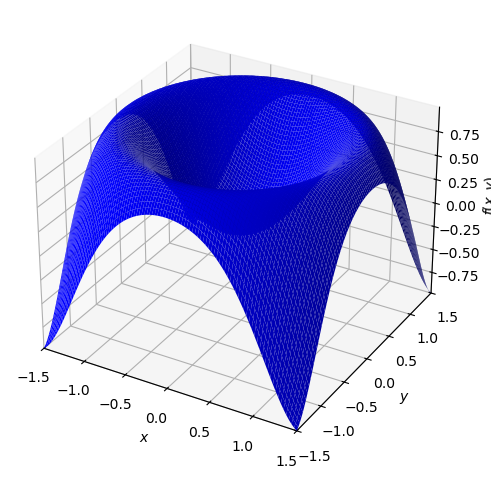

In [15]:
x,y = symbols("x y", real = True)
f = sin(x ** 2 + y ** 2)
dtuplot.plot3d(f,(x,-1.5,1.5),(y,-1.5,1.5),rendering_kw={"color" : "blue"})

Lad os udregne det approksimerende 1. gradspolynomium i udviklingspunktet $(0,0)$

In [16]:
P1 = dtutools.taylor(f,[x,0,y,0],degree=2)
P1

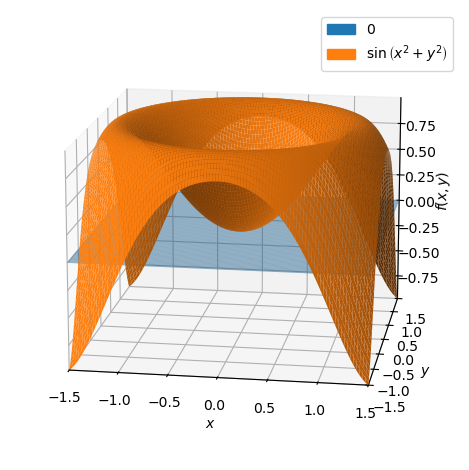

In [17]:
p = dtuplot.plot3d(P1,(x,-1.5,1.5),(y,-1.5,1.5),show=false,rendering_kw={"alpha" : 0.5},camera={"azim":-81,"elev":15})
p.extend(dtuplot.plot3d(f,(x,-1.5,1.5),(y,-1.5,1.5),show=False))
p.show()

Her kan vi se at $P1$ ligger i $(x,y)$ planen. Med udviklingspunkt $(1/10,0)$ fås:

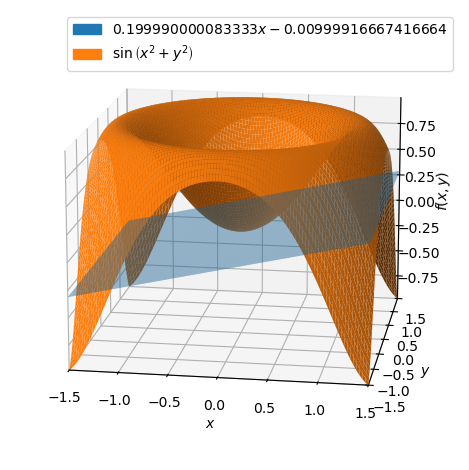

In [18]:
p = dtuplot.plot3d(dtutools.taylor(f,[x,0.1,y,0],degree=2),(x,-1.5,1.5),(y,-1.5,1.5),show=false,rendering_kw={"alpha" : 0.5},camera={"azim":-81,"elev":15})
p.extend(dtuplot.plot3d(f,(x,-1.5,1.5),(y,-1.5,1.5),show=False))
p.show()

Vi går tilbage til udviklingspunktet $(0,0)$. Lad os se hvordan det approksimerende 2. gradspolynomium ser ud.

In [19]:
P2 = dtutools.taylor(f,[x,0,y,0],3)
P2

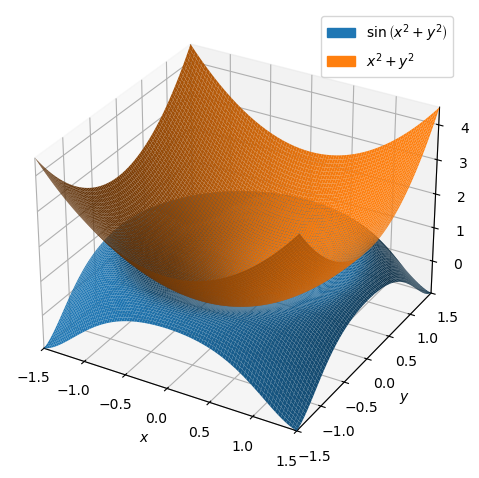

In [20]:
dtuplot.plot3d(f,P2,(x,-1.5,1.5),(y,-1.5,1.5))

Denne gang er det approksimerende polynomium en elliptisk paraboloide.
Lad os til sidst prøve at se hvordan, det approksimerende 6. gradspolyniom ser ud.

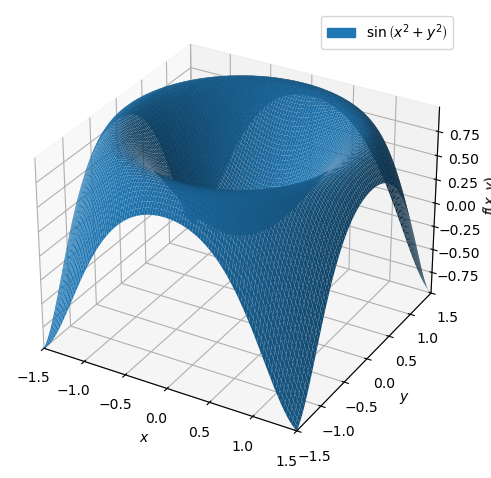

In [21]:
P6 = dtutools.taylor(f,[x,0,y,0],7)
p = dtuplot.plot3d(f,(x,-1.5,1.5),(y,-1.5,1.5),show=False)
p.legend=True
p.show()

Som forventet ligger de nu meget tættere på hinanden.
Lad os undersøge fejlen for de polynomier i nogle forskellige punkter for at se, hvor godt de passer.
Lad starte med $(0.2,0.2)$.

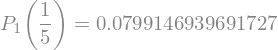

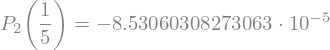

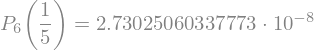

In [22]:
f_p1 = f.subs([(x, 1/5), (y, 1/5)])
P1_p1 = P1.subs([(x, 1/5), (y, 1/5)])
P2_p1 = P2.subs([(x, 1/5), (y, 1/5)])
P6_p1 = P6.subs([(x, 1/5), (y, 1/5)])

RHS_list = (f_p1 - P1_p1, f_p1 - P2_p1, f_p1 - P6_p1)
displayable_equations = [ Eq(Function(f'P_{i}')(S('1/5')), expression) for i, expression in zip((1,2,6), RHS_list) ]

display(*displayable_equations)

Det hele ser rigtigt ud. Fejlen er meget mindre for de approksimerende polynomier af højere grad.
Lad os prøve med $(0.5,0.5)$

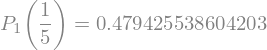

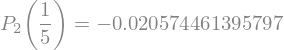

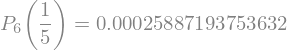

In [23]:
f_p2 = f.subs([(x,1/2),(y,1/2)])
P1_p2 = P1.subs([(x,1/2),(y,1/2)])
P2_p2 = P2.subs([(x,1/2),(y,1/2)])
P6_p2 = P6.subs([(x,1/2),(y,1/2)])

RHS_list = (f_p2 - P1_p2, f_p2 - P2_p2, f_p2 - P6_p2)
displayable_equations = [ Eq(Function(f'P_{i}')(S('1/5')), expression) for i, expression in zip((1,2,6), RHS_list) ]

display(*displayable_equations)

Jo længere væk vi kommer fra udviklingspunktet $(0,0)$ jo større fejl må vi forvente. 

(Det skal nævnes, at vores sammenligninger baserer sig på antagelsen om, at SymPy's egne approksimeringer er bedre end vores. Det er nok en ret god antagelse i det her tilfælde, men det er vigtigt at vide, at SymPy, Maple og alle andre computerredskaber også approksimerer.)

## Taylor-polynomier for funktioner af tre variable

Betragt funktionenen:

\begin{equation*}
f: \mathbb{R}^3\to \mathbb{R},\quad f(x_1,x_2,x_3) = \sin(x_1^2 - x_2)e^{x_3}
\end{equation*}

Vi ønsker at bestemme 2. grads Taylorpolynomiet med udviklingspunkt $\boldsymbol{x}_0 = (1,1,0)$.

In [24]:
x1,x2,x3 = symbols('x1,x2,x3', real = True)
f = sin(x1**2 - x2)*exp(x3)
f

Andengrads Taylor-polynomiet for en funktion af flere variable er givet ved

\begin{equation*}
P_2(\boldsymbol{x}) = f(\boldsymbol{x}_0) + \left<(\boldsymbol{x} - \boldsymbol{x}_0), \nabla f(\boldsymbol{x}_0)\right> + \frac{1}{2}\left<(\boldsymbol{x} - \boldsymbol{x}_0), \boldsymbol{H}_f(\boldsymbol{x}_0)(\boldsymbol{x}-\boldsymbol{x}_0)\right>
\end{equation*}

Først defineres $\boldsymbol{x}_0$ og $\boldsymbol{x}$

In [25]:
x = Matrix([x1,x2,x3])
x0 = Matrix([1,1,0])

Her efter findes $\nabla f(\boldsymbol{x}_0)$, og $\boldsymbol{H}_f(\boldsymbol{x}_0)$

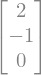

In [26]:
nabla_f = dtutools.gradient(f,(x1,x2,x3)).subs([(x1,x0[0]),(x2,x0[1]),(x3,x0[2])])
nabla_f

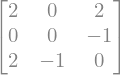

In [27]:
Hf = dtutools.hessian(f,(x1,x2,x3)).subs([(x1,x0[0]),(x2,x0[1]),(x3,x0[2])])
Hf

Nu kan $P_2$ bestemmes:

In [28]:
P2 = f.subs([(x1,x0[0]),(x2,x0[1]),(x3,x0[2])]) + nabla_f.dot(x - x0) + S('1/2')* (x - x0).dot(Hf*(x - x0))
P2.simplify()

Vi kan nu at se på differencen mellem det approksimerede polynomium og den rigtige funktion i nogle udvalgte værdier.

In [29]:
v1 = Matrix([1,1,0])
v2 = Matrix([1,0,1])
v3 = Matrix([0,1,1])
v4 = Matrix([1,2,3])
vs = [v1,v2,v3,v4]

In [30]:
for v in vs:
    print((f.subs({x1:v[0],x2:v[1],x3:v[2]}) - P2.subs({x1:v[0],x2:v[1],x3:v[2]})).evalf())

0
0.287355287178842
0.712644712821158
-12.9013965351501


Vi kan igen se at fejlen stiger når vi bevæger os længere væk fra udviklingspunktet.